In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import datetime
# import re
# import string
# import nltk
# from nltk.tokenize import word_tokenize
# from collections import Counter
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# nltk.download('punkt')

# # Load and clean dataset
# dataset = pd.read_csv("weblog.csv")
# dataset.columns = dataset.columns.str.strip()

# # Feature extraction functions
# def time_stats(dataframe):
#     def extract_time(time_str):
#         try:
#             time_part = time_str.split(":", 1)[1].split(" ")[0]
#             return datetime.datetime.strptime(time_part, "%H:%M:%S")
#         except Exception:
#             return datetime.datetime.strptime("00:00:00", "%H:%M:%S")
#     try:
#         processed_times = [extract_time(str(time)) for time in dataframe.iloc[:, 1].values]
#         time_diffs = [(processed_times[i] - processed_times[i - 1]).seconds for i in range(1, len(processed_times))]
#         if not time_diffs:
#             return 0, 0, 0, 0
#         max_time = max(time_diffs)
#         mean_time = sum(time_diffs) / len(time_diffs)
#         sum_time = sum(time_diffs)
#         var_time = sum((x - mean_time) ** 2 for x in time_diffs) / len(time_diffs)
#         return max_time, mean_time, sum_time, var_time
#     except:
#         return 0, 0, 0, 0

# def most_frequent(lst):
#     return max(set(lst), key=lst.count) if lst else None

# def bigram_stats(dataframe):
#     url_array = dataframe.iloc[:, 2].values
#     full_string = "".join([str(url).lower() for url in url_array])
#     full_string = re.sub(r"\d+", "", full_string)
#     full_string = full_string.translate(str.maketrans('', '', string.punctuation))
#     tokens = word_tokenize(full_string)
#     tokens = [t for t in tokens if t.lower() not in {"get", "post", "httpget", "httppost"}]

#     bigrams = list(nltk.bigrams(tokens))
#     trigrams = list(nltk.trigrams(tokens))
#     ngrams = list(nltk.ngrams(tokens, 6))

#     return (
#         tokens.count(most_frequent(tokens)) if tokens else 0,
#         bigrams.count(most_frequent(bigrams)) if bigrams else 0,
#         trigrams.count(most_frequent(trigrams)) if trigrams else 0,
#         ngrams.count(most_frequent(ngrams)) if ngrams else 0
#     )

# def most_visited_ip(dataframe):
#     return Counter(dataframe.iloc[:, 0].values).most_common(1)[0][0]

# def most_freq_status(dataframe):
#     return Counter(dataframe.iloc[:, 3].values).most_common(1)[0][0]

# # Create final dataset
# work_dataset = pd.DataFrame(columns=[
#     "Character-bigrams", "Character-ngrams", "Character-trigrams",
#     "Count_of_most_visited_page", "IP_Address", "Number_of_records", "Status",
#     "Time_Difference_Maximum", "Time_Difference_Mean", "Time_Difference_Sum", "Time_Difference_Variance"
# ])

# startindex = 0
# endindex = 0
# prevdate = ""
# p = 1

# for i, row in dataset.iterrows():
#     date = row["Timestamp"][1:12]
#     if i == 0:
#         prevdate = date
#     else:
#         if date == prevdate:
#             endindex += 1
#         else:
#             data = dataset.iloc[startindex:endindex + 1, :]
#             max_t, mean_t, sum_t, var_t = time_stats(data)
#             count_page, count_bi, count_tri, count_ng = bigram_stats(data)
#             most_ip = most_visited_ip(data)
#             most_status = most_freq_status(data)

#             work_dataset.loc[p] = [
#                 count_bi, count_ng, count_tri, count_page, most_ip,
#                 endindex - startindex + 1, most_status,
#                 max_t, mean_t, sum_t, var_t
#             ]
#             startindex = endindex + 1
#             endindex = startindex
#             prevdate = date
#             p += 1

# # Process last
# data = dataset.iloc[startindex:endindex + 1, :]
# max_t, mean_t, sum_t, var_t = time_stats(data)
# count_page, count_bi, count_tri, count_ng = bigram_stats(data)
# most_ip = most_visited_ip(data)
# most_status = most_freq_status(data)

# work_dataset.loc[p] = [
#     count_bi, count_ng, count_tri, count_page, most_ip,
#     endindex - startindex + 1, most_status,
#     max_t, mean_t, sum_t, var_t
# ]

# # Convert IP to int
# work_dataset["IP_rep"] = work_dataset["IP_Address"].apply(lambda ip: int(str(ip).replace(".", "")) if pd.notna(ip) else 0)
# work_dataset.drop("IP_Address", axis=1, inplace=True)

# # Features and labels
# X = work_dataset.drop("IP_rep", axis=1).values
# y = work_dataset["IP_rep"].values

# # Standardize features
# sc = StandardScaler()
# X = sc.fit_transform(X)

# # ------------------ ML MODELS -------------------
# results = []

# # KMeans
# kmeans = KMeans(n_clusters=5, random_state=0)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)
# # KMeans has no true labels to evaluate accuracy

# # Decision Tree
# dt = DecisionTreeClassifier(random_state=0)
# dt.fit(X, y)
# y_pred_dt = dt.predict(X)
# results.append([
#     "Decision Tree",
#     accuracy_score(y, y_pred_dt),
#     f1_score(y, y_pred_dt, average='macro'),
#     mean_squared_error(y, y_pred_dt)
# ])

# # Random Forest
# rf = RandomForestClassifier(random_state=0)
# rf.fit(X, y)
# y_pred_rf = rf.predict(X)
# results.append([
#     "Random Forest",
#     accuracy_score(y, y_pred_rf),
#     f1_score(y, y_pred_rf, average='macro'),
#     mean_squared_error(y, y_pred_rf)
# ])

# # SVM
# svm = SVC(kernel='rbf', random_state=0)
# svm.fit(X, y)
# y_pred_svm = svm.predict(X)
# results.append([
#     "SVM",
#     accuracy_score(y, y_pred_svm),
#     f1_score(y, y_pred_svm, average='macro'),
#     mean_squared_error(y, y_pred_svm)
# ])

# # --------- PRINT RESULTS AS TABLE --------------
# result_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy", "F1 Score", "MSE"])
# print("\n📊 ML Model Performance Comparison:")
# print(result_df.to_string(index=False))


In [4]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

nltk.download('punkt')

# Load and clean dataset
dataset = pd.read_csv("weblog.csv")
dataset.columns = dataset.columns.str.strip()

# Helper functions
def time_stats(dataframe):
    def extract_time(time_str):
        try:
            time_part = time_str.split(":", 1)[1].split(" ")[0]
            return datetime.datetime.strptime(time_part, "%H:%M:%S")
        except Exception:
            return datetime.datetime.strptime("00:00:00", "%H:%M:%S")
    try:
        processed_times = [extract_time(str(time)) for time in dataframe.iloc[:, 1].values]
        time_diffs = [(processed_times[i] - processed_times[i - 1]).seconds for i in range(1, len(processed_times))]
        if not time_diffs:
            return 0, 0, 0, 0
        max_time = max(time_diffs)
        mean_time = sum(time_diffs) / len(time_diffs)
        sum_time = sum(time_diffs)
        var_time = sum((x - mean_time) ** 2 for x in time_diffs) / len(time_diffs)
        return max_time, mean_time, sum_time, var_time
    except:
        return 0, 0, 0, 0

def most_frequent(lst):
    return max(set(lst), key=lst.count) if lst else None

def bigram_stats(dataframe):
    url_array = dataframe.iloc[:, 2].values
    full_string = "".join([str(url).lower() for url in url_array])
    full_string = re.sub(r"\d+", "", full_string)
    full_string = full_string.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(full_string)
    tokens = [t for t in tokens if t.lower() not in {"get", "post", "httpget", "httppost"}]
    bigrams = list(nltk.bigrams(tokens))
    trigrams = list(nltk.trigrams(tokens))
    ngrams = list(nltk.ngrams(tokens, 6))
    return (
        tokens.count(most_frequent(tokens)) if tokens else 0,
        bigrams.count(most_frequent(bigrams)) if bigrams else 0,
        trigrams.count(most_frequent(trigrams)) if trigrams else 0,
        ngrams.count(most_frequent(ngrams)) if ngrams else 0
    )

def most_visited_ip(dataframe):
    return Counter(dataframe.iloc[:, 0].values).most_common(1)[0][0]

def most_freq_status(dataframe):
    return Counter(dataframe.iloc[:, 3].values).most_common(1)[0][0]

# Create final dataset
work_dataset = pd.DataFrame(columns=[
    "Character-bigrams", "Character-ngrams", "Character-trigrams",
    "Count_of_most_visited_page", "IP_Address", "Number_of_records", "Status",
    "Time_Difference_Maximum", "Time_Difference_Mean", "Time_Difference_Sum", "Time_Difference_Variance"
])

startindex = 0
endindex = 0
prevdate = ""
p = 1

for i, row in dataset.iterrows():
    date = row["Timestamp"][1:12]
    if i == 0:
        prevdate = date
    else:
        if date == prevdate:
            endindex += 1
        else:
            data = dataset.iloc[startindex:endindex + 1, :]
            max_t, mean_t, sum_t, var_t = time_stats(data)
            count_page, count_bi, count_tri, count_ng = bigram_stats(data)
            most_ip = most_visited_ip(data)
            most_status = most_freq_status(data)
            work_dataset.loc[p] = [
                count_bi, count_ng, count_tri, count_page, most_ip,
                endindex - startindex + 1, most_status,
                max_t, mean_t, sum_t, var_t
            ]
            startindex = endindex + 1
            endindex = startindex
            prevdate = date
            p += 1

# Process last date
data = dataset.iloc[startindex:endindex + 1, :]
max_t, mean_t, sum_t, var_t = time_stats(data)
count_page, count_bi, count_tri, count_ng = bigram_stats(data)
most_ip = most_visited_ip(data)
most_status = most_freq_status(data)
work_dataset.loc[p] = [
    count_bi, count_ng, count_tri, count_page, most_ip,
    endindex - startindex + 1, most_status,
    max_t, mean_t, sum_t, var_t
]

# Convert IP to int
work_dataset["IP_rep"] = work_dataset["IP_Address"].apply(lambda ip: int(str(ip).replace(".", "")) if pd.notna(ip) else 0)
work_dataset.drop("IP_Address", axis=1, inplace=True)

# Prepare features and labels
X = work_dataset.drop("IP_rep", axis=1).values
y = work_dataset["IP_rep"].values

# Scale features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\shubham\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


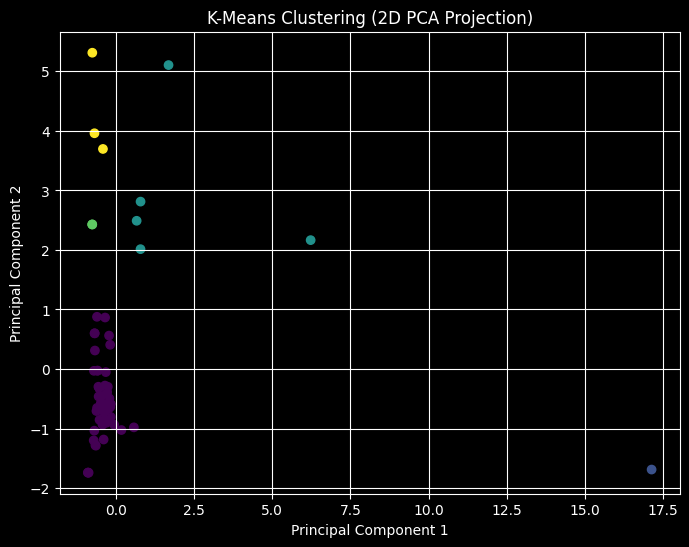

In [5]:
from sklearn.cluster import KMeans

# Fit K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize clusters (projected to 2D using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Decision Tree:
Accuracy: 1.000
F1 Score: 1.000
MSE: 0.000


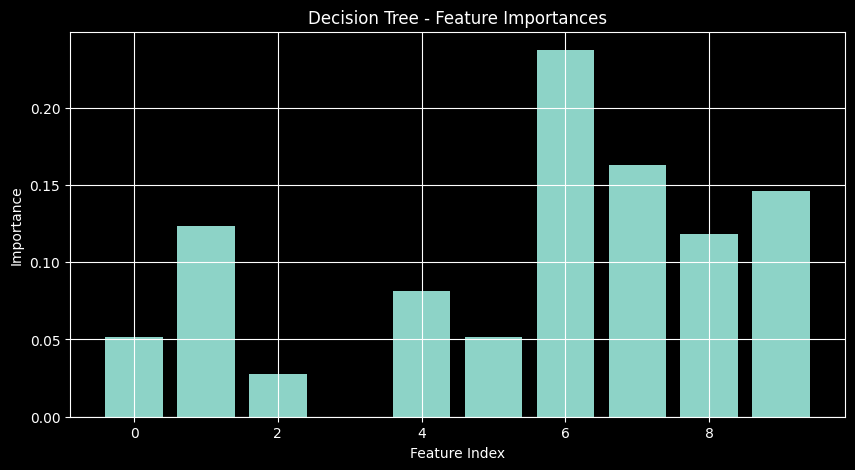

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y)
y_pred_dt = dt.predict(X)

# Metrics
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y, y_pred_dt):.3f}")
print(f"F1 Score: {f1_score(y, y_pred_dt, average='macro'):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred_dt):.3f}")

# Visualize decision tree feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), dt.feature_importances_)
plt.title("Decision Tree - Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid(True)
plt.show()


Random Forest:
Accuracy: 1.000
F1 Score: 1.000
MSE: 0.000


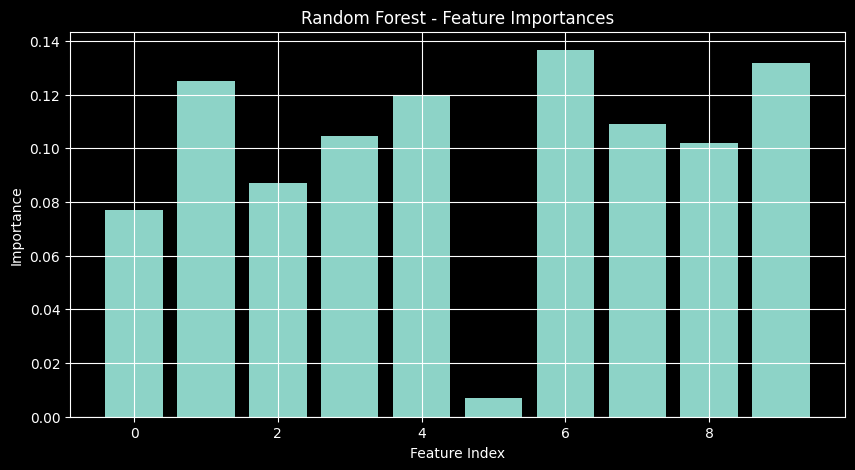

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Metrics
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y, y_pred_rf):.3f}")
print(f"F1 Score: {f1_score(y, y_pred_rf, average='macro'):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred_rf):.3f}")

# Feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), rf.feature_importances_)
plt.title("Random Forest - Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.grid(True)
plt.show()


In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0)
svm.fit(X, y)
y_pred_svm = svm.predict(X)

# Metrics
print("SVM:")
print(f"Accuracy: {accuracy_score(y, y_pred_svm):.3f}")
print(f"F1 Score: {f1_score(y, y_pred_svm, average='macro'):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred_svm):.3f}")


SVM:
Accuracy: 0.441
F1 Score: 0.333
MSE: 9535.294
